In [1]:
#construct a decision tree classifier. ~99% accuracy from cross validation

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [2]:
#import feature_extraction

#for i in range(1,10):
#    feature_extraction.extract(i)

In [3]:
datalabels=[]
for i in range(1,10):
    feature_names,datalabelsi=np.load('data'+str(i)+'.npy')
    datalabels.append(datalabelsi)

In [4]:
[x.shape for x in datalabels]

[(2142, 99),
 (2276, 99),
 (1463, 99),
 (2007, 99),
 (2366, 99),
 (2166, 99),
 (1994, 99),
 (2261, 99),
 (0, 99)]

In [5]:
datalabels=np.vstack(datalabels)

In [6]:
datalabels.shape

(16675, 99)

In [7]:
#shuffle data
np.random.shuffle(datalabels)

traindata2=datalabels[:,:98]
trainlabels2=datalabels[:,-1]


cls=DecisionTreeClassifier()
cls.fit(traindata2,trainlabels2)

cross_val_score(cls, traindata2, trainlabels2)

array([0.98562185, 0.99082073, 0.98883888])

In [8]:
cls=DecisionTreeClassifier(max_depth=7)
cls.fit(traindata2[:12000],trainlabels2[:12000])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
cls.score(traindata2[12000:],trainlabels2[12000:])

0.9666310160427808

In [10]:
cls.predict(traindata2[12000:12050])

array([ 2.,  7.,  4.,  4., 16.,  1.,  1.,  6.,  1.,  5., 17.,  3.,  5.,
        7., 17.,  6., 16.,  4.,  1., 16.,  4.,  4., 16., 17.,  2.,  2.,
       24.,  7.,  4.,  2.,  2.,  4.,  4., 13.,  5.,  6.,  1.,  4., 17.,
       17., 16.,  7., 17.,  2., 17.,  2., 16.,  5.,  7.,  4.])

In [11]:
trainlabels2[12000:12050]

array([ 2.,  7.,  4.,  4., 16.,  1.,  1.,  6.,  1.,  5., 17.,  3.,  5.,
        7., 17.,  6., 16.,  4.,  1., 16.,  4.,  4., 16., 17.,  2.,  2.,
       24.,  7.,  4.,  2.,  2.,  4.,  4., 13.,  5.,  6.,  1.,  4., 17.,
       17., 16.,  7., 17.,  2., 17.,  2., 16.,  5.,  7.,  4.])

In [12]:
y=cls.feature_importances_
a=[[feature_names[i],y[i]] for i in range(len(y))]
a.sort(key=lambda x:-x[1])

In [13]:
a[:20]

[['ankle_gyro_z_std', 0.15089672498725218],
 ['ankle_a16_x_mean', 0.11417068050540403],
 ['hand_a16_freq_0.95', 0.10914408455348604],
 ['chest_B_y_mean', 0.10264802382038725],
 ['chest_a16_y_std', 0.08934448182573564],
 ['hand_a16_x_mean', 0.08297603044328525],
 ['chest_gyro_y_std', 0.07244538504979188],
 ['hand_gyro_freq_0.95', 0.07204931680383447],
 ['ankle_a16_x_std', 0.06071642543942388],
 ['chest_gyro_freq_0.75', 0.02369307980794691],
 ['chest_a16_z_mean', 0.022730129777254533],
 ['hand_temp_mean', 0.011903486980051605],
 ['chest_temp_mean', 0.010510946200121777],
 ['chest_a16_y_mean', 0.00870945870071427],
 ['hand_gyro_x_std', 0.008257577295659815],
 ['hand_a16_z_mean', 0.007334295574025123],
 ['ankle_gyro_x_mean', 0.0072099268123013895],
 ['chest_B_z_mean', 0.006911084586508274],
 ['heart_rate_mean', 0.005711111324888736],
 ['hand_B_x_mean', 0.004886960327075418]]

In [14]:
activity_dict={0:'other',1:'lying',2:'sitting',3:'standing',4:'walking',5:'running',6:'cycling',7:'nordic walking',
              9:'watching TV',10:'computer work',11:'car driving',12:'ascending stairs',13:'descending stairs',
              16:'vacuum cleaning',17:'ironing',18:'folding laundry',19:'house cleaning',20:'playing_soccer',
              24:'rope jumping'}
class_name=np.array([activity_dict[i] for i in activity_dict.keys()])[1:]

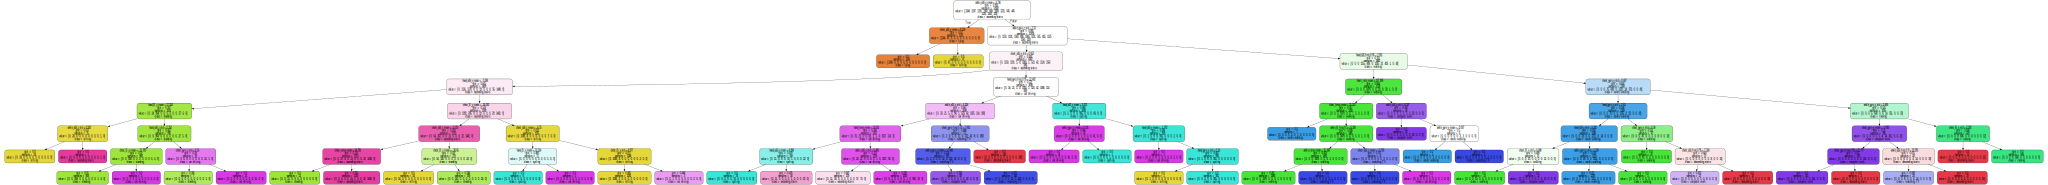

In [15]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(cls, out_file=None, 
                         feature_names=feature_names,  
                         class_names=class_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [16]:
from sklearn.externals.six import StringIO
import pydotplus   #using pydotplus in windows10, python 3.6.X
dot_data = StringIO()

tree.export_graphviz(cls, out_file=dot_data, 
                         feature_names=feature_names,  
                         class_names=class_name, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

True

In [2]:
feature_names,datalabels=np.load('data1.npy')

#shuffle data
np.random.shuffle(datalabels)

traindata2=datalabels[:,:98]
trainlabels2=datalabels[:,-1]

cls=DecisionTreeClassifier()
cls.fit(traindata2,trainlabels2)

cross_val_score(cls, traindata2, trainlabels2)

array([0.99581006, 0.99300699, 1.        ])

In [3]:
y=cls.feature_importances_
[(feature_names[i],y[i]) for i in range(len(y))]

[('heart_rate_mean', 0.00861820208865835),
 ('heart_rate_std', 0.0),
 ('hand_temp_mean', 0.0),
 ('hand_temp_std', 0.0),
 ('hand_a16_x_mean', 0.08348618863158212),
 ('hand_a16_x_std', 0.0),
 ('hand_a16_y_mean', 0.0),
 ('hand_a16_y_std', 0.0),
 ('hand_a16_z_mean', 0.0),
 ('hand_a16_z_std', 0.0),
 ('hand_a16_freq_0.5', 0.0),
 ('hand_a16_freq_0.75', 0.0),
 ('hand_a16_freq_0.9', 0.0),
 ('hand_a16_freq_0.95', 0.0),
 ('hand_gyro_x_mean', 0.0),
 ('hand_gyro_x_std', 0.0),
 ('hand_gyro_y_mean', 0.0),
 ('hand_gyro_y_std', 0.0),
 ('hand_gyro_z_mean', 0.0),
 ('hand_gyro_z_std', 0.0),
 ('hand_gyro_freq_0.5', 0.0),
 ('hand_gyro_freq_0.75', 0.0),
 ('hand_gyro_freq_0.9', 0.0),
 ('hand_gyro_freq_0.95', 0.0),
 ('hand_B_x_mean', 0.0),
 ('hand_B_x_std', 0.0),
 ('hand_B_y_mean', 0.0),
 ('hand_B_y_std', 0.0),
 ('hand_B_z_mean', 0.0),
 ('hand_B_z_std', 0.0),
 ('hand_B_freq_0.5', 0.0),
 ('hand_B_freq_0.75', 0.0),
 ('hand_B_freq_0.9', 0.0),
 ('hand_B_freq_0.95', 0.0),
 ('chest_temp_mean', 0.09976805700942334),


In [21]:
feature_names,datalabels=np.load('data2.npy')

#shuffle data
np.random.shuffle(datalabels)

traindata2=datalabels[:,:98]
trainlabels2=datalabels[:,-1]


cls=DecisionTreeClassifier()
cls.fit(traindata2,trainlabels2)

cross_val_score(cls, traindata2, trainlabels2)

array([0.99737533, 0.99473684, 0.99734748])

In [22]:
traindata2.shape

(2276, 98)